In [82]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
heart_data = pd.read_csv('heart.csv')
heart_data.head()

Saving heart.csv to heart (9).csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
heart_data_x = heart_data.drop(columns="HeartDisease", axis=1)
heart_data_y = heart_data["HeartDisease"]

In [84]:
heart_data_x_encoded = pd.get_dummies(heart_data_x,drop_first=True)
heart_data_x_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [85]:
X_train, X_test, y_train, y_test = train_test_split(heart_data_x_encoded, heart_data_y, test_size=0.2)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train,y_train)
train_predictions=dtree.predict(X_train)
test_predictions=dtree.predict(X_test)
train_accuracy=accuracy_score(y_train,train_predictions)
test_accuracy=accuracy_score(y_test,test_predictions)
print('Train acc',train_accuracy)
print('Test acc',test_accuracy)

Train acc 0.840599455040872
Test acc 0.8152173913043478


In [87]:
best_acc=0
for criterion in ['gini','entropy']:
  for max_depth in [2,3,4,5,6]:
    for min_samples_leaf in [5,10,20,30]:
      dtree=DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf)
      dtree.fit(X_train,y_train)
      train_predictions=dtree.predict(X_train)
      test_accuracy=accuracy_score(y_test,test_predictions)
      if test_accuracy>best_acc:
        best_params=f"criterion:{criterion},max_depth:{max_depth},min_samples_leaf:{min_samples_leaf}"
        best_acc=test_accuracy


In [88]:
print(best_params)
print(best_acc)

criterion:gini,max_depth:2,min_samples_leaf:5
0.8152173913043478


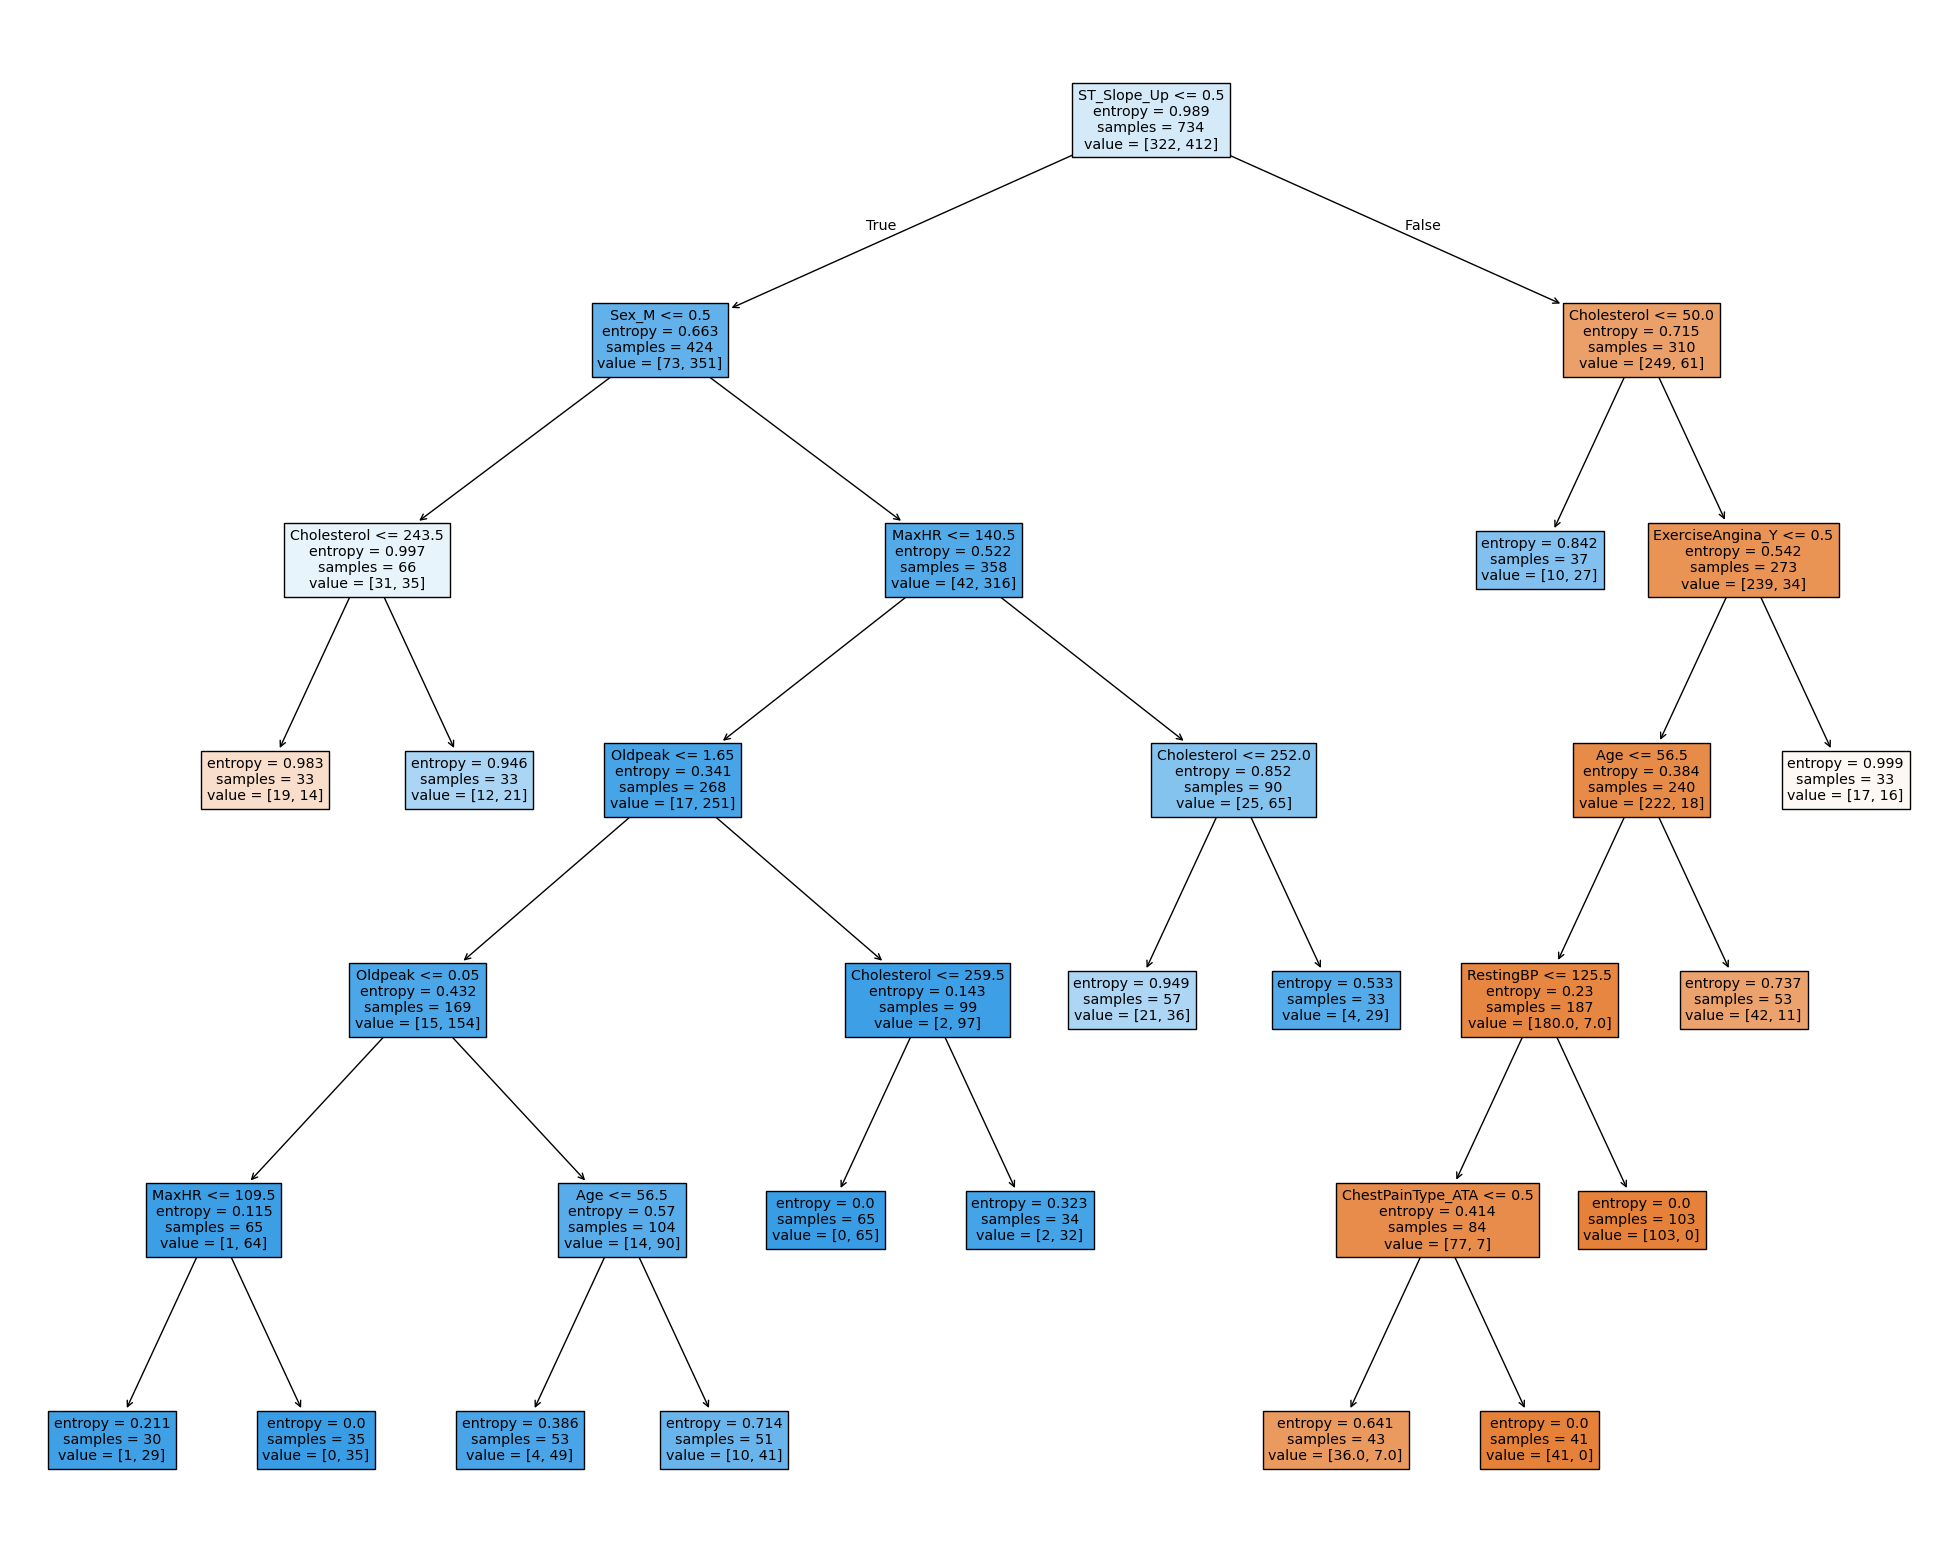

In [89]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(dtree,filled=True,feature_names=heart_data_x_encoded.columns)
fig.savefig("heart_tree.png")